##Visualización del dataframe

In [ ]:
import pandas as pd
df = pd.read_csv('filtered_balanced_AHR_constopcombined_bigrams_3.csv', usecols=['title', 'rating', 'review_text', 'cleaned_review_text'])
df

,title,rating,review_text,cleaned_review_text
0,IMPOSIBLE DESCANSAR,1,El fin de semana mi pareja y yo hicimos una re...,fin semana parejo hicimo reserva hotel fin des...
1,No es oro todo lo que reluce,3,"El hotel en general está bien, las habtiacione...",hotel general bien habtiación espaciosa person...
2,Un buen hotel con mucho ruido.,3,"El hotel es moderno, amplio y limpio, pero no ...",hotel moderno amplio limpio no poder disfrutar...
3,SIN CALEFACCIÓN OPERATIVA Y CON FRÍO,1,Calefacción averiada o no operativa. Se coment...,calefacción averiado no operativo comentar rec...
4,Deja bastante que desear.,1,Este hotel ha bajado notoriamente su categoria...,hotel bajado notoriamente categorio habitación...
...,...,...,...,...
7515,Excelente !!!,5,Experiencia increíble súper recomendable. La g...,experiencia increíble súper recomendable gente...
7516,Muy acogedor y excelente trato,5,"Trato muy amable y muy atento en todo momento,...",trato amable atento momento habitación acogedo...
7517,Genial !!!,5,"Hotel fantastico, muy buena ubicacion, muy bon...",hotel fantastico buen ubicacion bonito acogedo...
7518,HOTEL EXCELENTE ASÍ COMO SUS EMPLEADOS,5,Hemos estado alojados mi esposa y yo en el hot...,alojado esposa hotel eurostars cuatro día prim...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

tfidf = TfidfVectorizer(max_features=5000, min_df=0.001)
# Generar la matriz TF-IDF
X_tfidf = tfidf.fit_transform(df['cleaned_review_text'])

# Obtener las etiquetas
y = df['rating']

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


Accuracy: 0.84


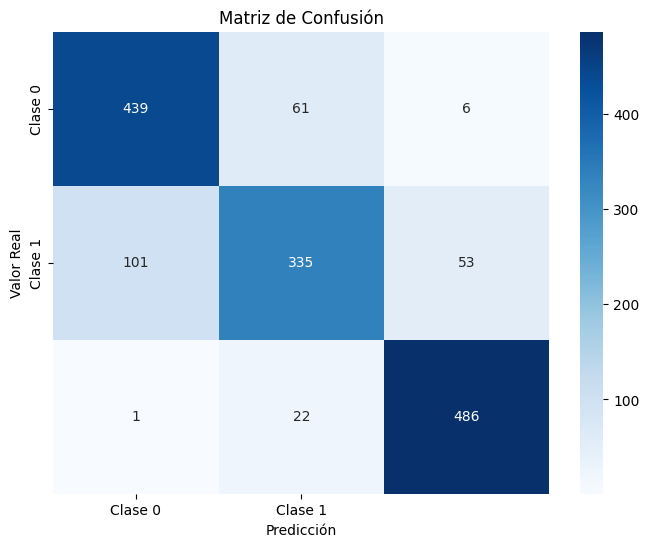

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Crear y entrenar el modelo
model = MultinomialNB()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


# matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Grafica
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

Accuracy: 0.85


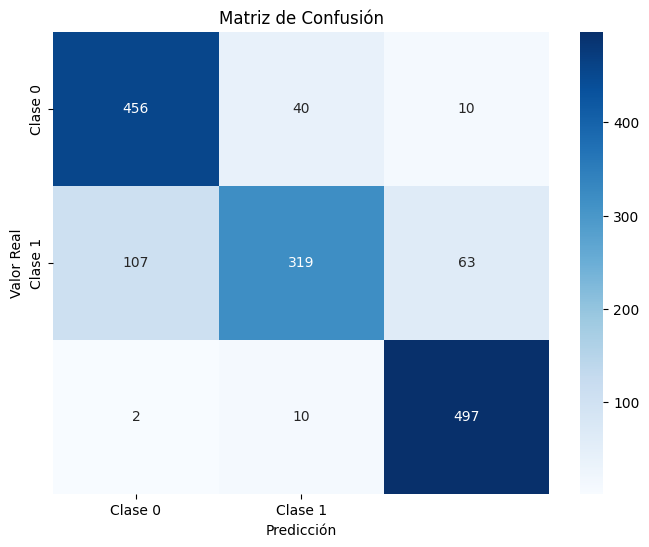

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Crear y entrenar el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Grafica
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()


Accuracy: 0.74


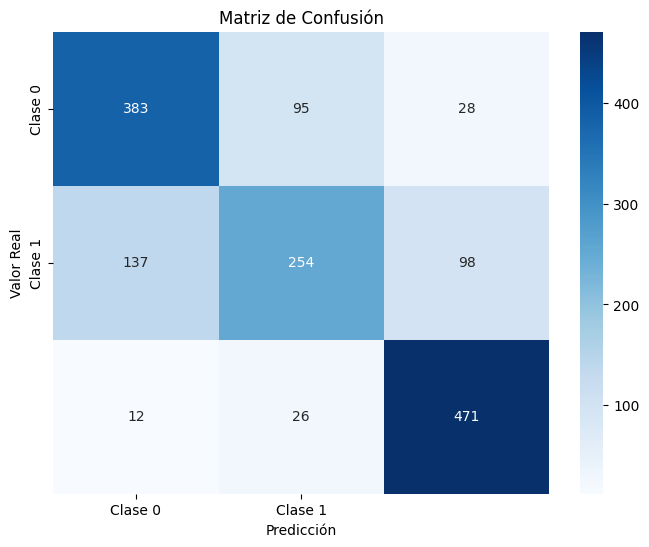

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Crear y entrenar el modelo
knn = KNeighborsClassifier(n_neighbors=7, metric='cosine')
knn.fit(X_train, y_train)


# Hacer predicciones
y_pred = knn.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


# matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Grafica
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()


In [ ]:
from sklearn.svm import SVC
# Crear y entrenar el modelo
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Hacer predicciones
y_pred = svm.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Grafica
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()


Accuracy: 0.85


In [ ]:
df_bi = pd.read_csv('bigrama_resultados.csv', usecols=['positivos_detectados','negativos_detectados'])
df_bi

,positivos_detectados,negativos_detectados
0,0,0
1,1,0
2,1,3
3,0,1
4,0,0
...,...,...
7515,0,0
7516,0,0
7517,0,0
7518,0,0


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


# Convertir la matriz TF-IDF a un DataFrame de pandas
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

df_tfidf['positivos'] =  df_bi['positivos_detectados']
df_tfidf['negativos'] = df_bi['negativos_detectados']

print(df_tfidf)

      abajo  abandonado  abandonar  aber  abierto  abonar  abr  abrigo  abril  \
0       0.0         0.0        0.0   0.0      0.0     0.0  0.0     0.0    0.0   
1       0.0         0.0        0.0   0.0      0.0     0.0  0.0     0.0    0.0   
2       0.0         0.0        0.0   0.0      0.0     0.0  0.0     0.0    0.0   
3       0.0         0.0        0.0   0.0      0.0     0.0  0.0     0.0    0.0   
4       0.0         0.0        0.0   0.0      0.0     0.0  0.0     0.0    0.0   
...     ...         ...        ...   ...      ...     ...  ...     ...    ...   
7515    0.0         0.0        0.0   0.0      0.0     0.0  0.0     0.0    0.0   
7516    0.0         0.0        0.0   0.0      0.0     0.0  0.0     0.0    0.0   
7517    0.0         0.0        0.0   0.0      0.0     0.0  0.0     0.0    0.0   
7518    0.0         0.0        0.0   0.0      0.0     0.0  0.0     0.0    0.0   
7519    0.0         0.0        0.0   0.0      0.0     0.0  0.0     0.0    0.0   

      abrimo  ...  época  í

In [ ]:
X = df_tfidf
Y = df['rating']
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Accuracy: 0.81


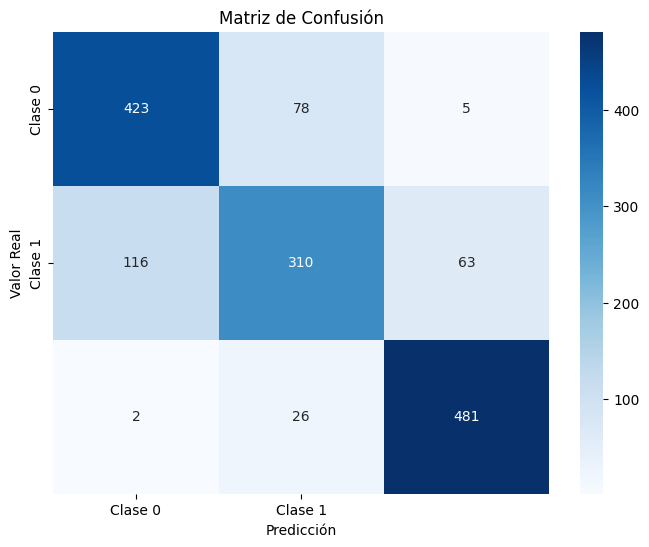

In [ ]:
# Crear y entrenar el modelo
model = MultinomialNB()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


# matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Grafica
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

Accuracy: 0.85


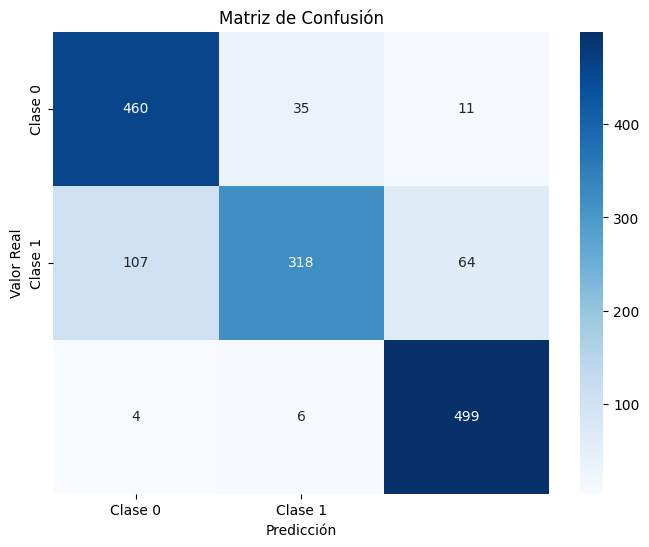

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Crear y entrenar el modelot
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


# matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Crear y entrenar el modelo
knn = KNeighborsClassifier(n_neighbors=7, metric='cosine')
knn.fit(X_train, y_train)


# Hacer predicciones
y_pred = knn.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



# matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Grafica
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

Accuracy: 0.85


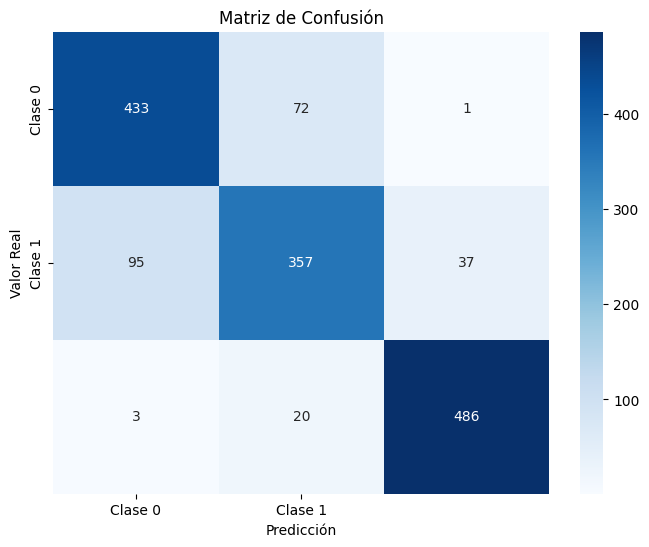

In [ ]:
from sklearn.svm import SVC
# Crear y entrenar el modelo
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Hacer predicciones
y_pred = svm.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


# matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Grafica
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()